# S03 T05: Exploració de les dades

#### Exercici 1: Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/Users/deliagonzalezmata/Downloads/DelayedFlights.csv') 

df = df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'AirTime', 'ArrDelay','ArrTime', 'CRSArrTime', 'Origin', 'Dest', 'Distance', 'Cancelled']]

df.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,ArrTime,CRSArrTime,Origin,Dest,Distance,Cancelled
0,2008,1,3,4,WN,116.0,-14.0,2211.0,2225,IAD,TPA,810,0
1,2008,1,3,4,WN,113.0,2.0,1002.0,1000,IAD,TPA,810,0
2,2008,1,3,4,WN,76.0,14.0,804.0,750,IND,BWI,515,0
3,2008,1,3,4,WN,77.0,34.0,1959.0,1925,IND,BWI,515,0
4,2008,1,3,4,WN,87.0,11.0,2121.0,2110,IND,JAX,688,0


### Exercici 2: Fes un informe complet del data set:

* Resumeix estadísticament les columnes d’interès

In [87]:
df.describe()


,Year,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,ArrTime,CRSArrTime,Distance,Cancelled
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.928371e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.936758e+06
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.082771e+02,4.219988e+01,1.610141e+03,1.634225e+03,7.656862e+02,3.268348e-04
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,6.864261e+01,5.678472e+01,5.481781e+02,4.646347e+02,5.744797e+02,1.807562e-02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.090000e+02,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,5.800000e+01,9.000000e+00,1.316000e+03,1.325000e+03,3.380000e+02,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,9.000000e+01,2.400000e+01,1.715000e+03,1.705000e+03,6.060000e+02,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.370000e+02,5.600000e+01,2.030000e+03,2.014000e+03,9.980000e+02,0.000000e+00
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,1.091000e+03,2.461000e+03,2.400000e+03,2.400000e+03,4.962000e+03,1.000000e+00


* Troba quantes dades faltants hi ha per columna

In [31]:
df.isnull().sum()

Year                0
Month               0
DayofMonth          0
DayOfWeek           0
UniqueCarrier       0
AirTime          8387
ArrDelay         8387
ArrTime          7110
CRSArrTime          0
Origin              0
Dest                0
Distance            0
Cancelled           0
dtype: int64

* Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)

Text(4, 4, 'velocitat mitjana')

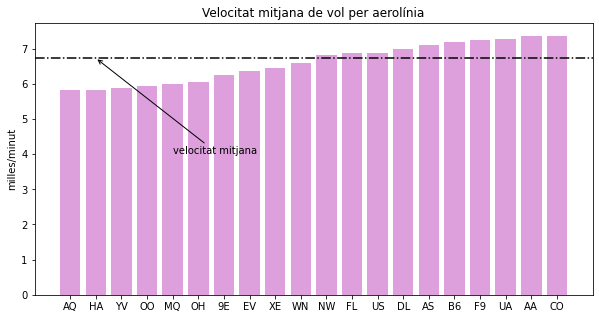

In [83]:
# nova columna: Velocitat mitjana de vol 

df['AvgSpeed'] = df['Distance'] / df['AirTime']

# Gràfic per veure la velocitat mitjana de vol entre les diferents Aerolínies:

fig,ax = plt.subplots(figsize=(10,5))

vel_mitjana = df.groupby('UniqueCarrier').AvgSpeed.median().sort_values()

ax.bar(x=vel_mitjana.index, height = vel_mitjana.values, color = '#DDA0DD')
ax.set(title = 'Velocitat mitjana de vol per aerolínia', ylabel = 'milles/minut')

ax.axhline(df.AvgSpeed.median(),color='black', linestyle='-.')
ax.annotate('velocitat mitjana', xy=(1, df.AvgSpeed.median()), xytext = (4,4), arrowprops = dict(arrowstyle='->'))


Text(0.5, 1.0, 'Han arribat tard els vols?')

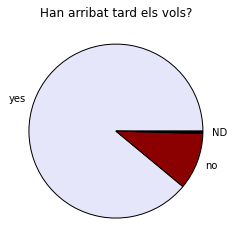

In [176]:
# nova columna: ha arribat tard?

def delayed_func(x):
    if x > 0:
        return 'yes'
    if x <= 0:
        return 'no'
    else:
        return 'ND'
    
df['Late'] = df['ArrDelay'].apply(delayed_func)

compte = df['Late'].value_counts()
values = df['Late'].value_counts().keys().tolist()
colors = ['#E6E6FA', '#8B0000', '#000000']

plt.pie(compte, labels = values,labeldistance = 1.1, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' }, colors = colors)

plt.title('Han arribat tard els vols?')



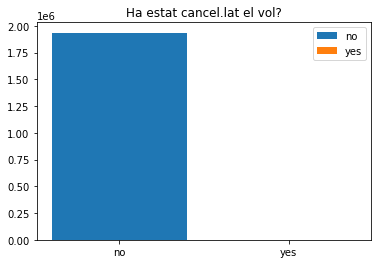

In [113]:
# nova columna: s'ha cancelat?

def cancelled_func(x):
    if x == 0:
        return 'no'
    if x == 1:
        return 'yes'
    else:
        return 'ND'
    
df['Is_cancelled'] = df['Cancelled'].apply(cancelled_func)

# veiem-ho gràficament:

labels = []
for i, dfi in enumerate(df.groupby(["Is_cancelled"])):
    labels.append(dfi[0])
    plt.bar(i, dfi[1].count(), label=dfi[0])

plt.xticks(range(len(labels)), labels)
plt.legend()
plt.title('Ha estat cancel.lat el vol?')
plt.show()

In [3]:
# nova columna: noms de les aerolínies

carrier_flights = df['UniqueCarrier'].groupby(df['UniqueCarrier']).count()
carrier_names = pd.Series(['Pinnacle Airlines', 'American Airlines','Aloha Air', 'Alaska Airlines', 'Jetblue Airways',
                      'Cobaltair', 'Delta Air Lines', 'ExpressJet Airlines', 'Frontier Airlines', 'AirTran Airways',
                      'Hawaiian Airlines', 'Envoy Air', 'Northwest Airlines', 'US Airways Express', 
                      'SkyWest Airlines', 'United Airlines', 'US Airways', 'Southwest Airlines',
                      'JetSuiteX Air', 'Mesa Airlines'], index=carrier_flights.index)

dict_name = carrier_names.to_dict()
def name_func(x):
    return dict_name[x]

df['Airline'] = df['UniqueCarrier'].apply(name_func)


# nova columna: noms dels dies de la setmana

days_week = df['DayOfWeek'].groupby(df['DayOfWeek']).count()
days_names = pd.Series(['Dilluns', 'Dimarts','Dimecres', 'Dijous', 'Divendres',
                      'Dissabte', 'Diumenge'], index=days_week.index)

dict_days = days_names.to_dict()
def day_func(x):
    return dict_days[x]

df['Day_W'] = df['DayOfWeek'].apply(day_func)


# nova columna: data del vol

df = df.rename(columns={'DayofMonth': 'Day'})
date = df[['Year', 'Month', 'Day']]
date.head()
df['Date'] = pd.to_datetime(date)


# eliminem columnes que ja no volem

df = df.drop("Year",1) 
df = df.drop("Day",1) 
df = df.drop("Month",1)
df = df.drop("DayOfWeek",1)
df = df.drop("Cancelled",1)

df.head()

,UniqueCarrier,AirTime,ArrDelay,ArrTime,CRSArrTime,Origin,Dest,Distance,Airline,Day_W,Date
0,WN,116.0,-14.0,2211.0,2225,IAD,TPA,810,Southwest Airlines,Dijous,2008-01-03
1,WN,113.0,2.0,1002.0,1000,IAD,TPA,810,Southwest Airlines,Dijous,2008-01-03
2,WN,76.0,14.0,804.0,750,IND,BWI,515,Southwest Airlines,Dijous,2008-01-03
3,WN,77.0,34.0,1959.0,1925,IND,BWI,515,Southwest Airlines,Dijous,2008-01-03
4,WN,87.0,11.0,2121.0,2110,IND,JAX,688,Southwest Airlines,Dijous,2008-01-03


* Taula de les aerolínies amb més endarreriments acumulats

In [4]:
df['Retard(min)'] = df['ArrTime'] - df['CRSArrTime']

df.dropna(subset = ["AirTime",'ArrDelay','ArrTime'], inplace=True)
df['Retard(min)'] = df['Retard(min)'].apply(lambda x: "0" if x < 0 else x).astype(int)

retards_aeris = df[['Airline','Retard(min)']].groupby('Airline').sum().sort_values(by=('Retard(min)'), ascending=False)

retards_aeris


,Retard(min)
Airline,
Southwest Airlines,16950784
American Airlines,12755169
United Airlines,10108169
Envoy Air,9844151
SkyWest Airlines,9320474
JetSuiteX Air,7716847
Delta Air Lines,6879622
ExpressJet Airlines,6098944
Cobaltair,5838766


<AxesSubplot:title={'center':'Retards aeris acumulats'}, xlabel='Airline'>

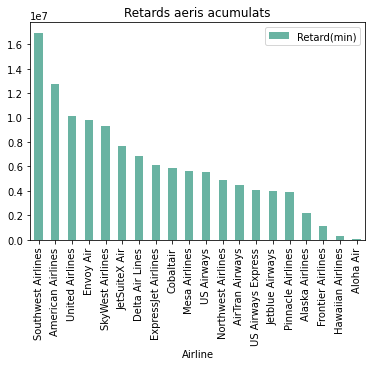

In [111]:
# Si ho posem en format gràfic de barres

retards_aeris.plot(kind='bar', title = 'Retards aeris acumulats', color = '#69b3a2')

* Quins són els vols més llargs? I els més endarrerits? 

In [5]:
# Per saber els 15 vols més llargs:

df['Aeroports'] = df['Origin'] + '-' + df['Dest']

df_distance = df[['Distance', 'Aeroports']]
sorted_distance = df_distance.sort_values(by='Distance', ascending = False)
vols = sorted_distance.drop_duplicates(subset = 'Distance')[:15]

vols 

,Distance,Aeroports
362407,4962,EWR-HNL
1423490,4502,ATL-HNL
66593,4243,ORD-HNL
1323574,4213,KOA-ORD
66628,4184,ORD-OGG
1600434,3972,MSP-HNL
1618875,3904,HNL-IAH
1603691,3784,DFW-HNL
1894358,3711,OGG-DFW
1347931,3417,ANC-ATL


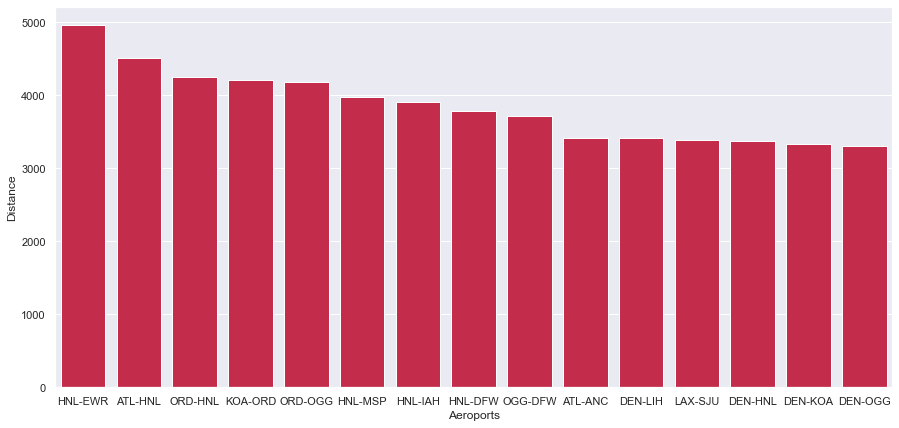

In [4]:
# Ho posem en format gràfic
sns.set(style="darkgrid")
plt.figure(figsize =(15,7))

sns.barplot(x = 'Aeroports',
           y = 'Distance',
           data = vols,
           color = '#DC143C');

In [6]:
# Per saber els vols més endarrerits:

df['Retard(min)'] = df['ArrTime'] - df['CRSArrTime']

df.dropna(subset = ["AirTime",'ArrDelay','ArrTime'], inplace=True)
df['Retard(min)'] = df['Retard(min)'].apply(lambda x: "0" if x < 0 else x).astype(int)

retards_aeris = df[['Aeroports','Retard(min)']].sort_values(by='Retard(min)', ascending = False)

retards = retards_aeris.drop_duplicates(subset = 'Aeroports')[:15]
retards

,Aeroports,Retard(min)
642570,CLT-PBI,2399
1168897,CLT-FLL,2399
429132,CLT-EWR,2399
448965,SFO-ORD,2399
1564492,SFO-IAD,2399
1362359,ATL-SEA,2398
1143106,ORD-SDF,2397
44791,CLT-IAH,2397
1920882,FLL-EWR,2397
1146821,SFO-ACV,2397


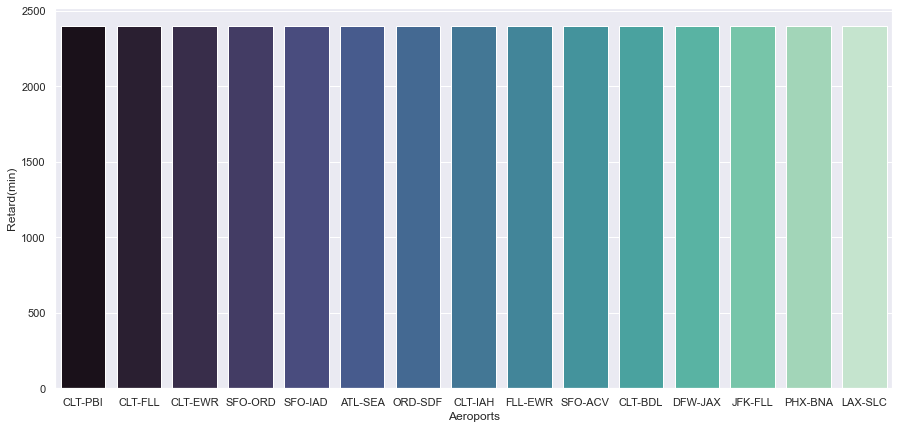

In [7]:
# Ho posem en format gràfic: 

sns.set(style="darkgrid")
plt.figure(figsize =(15,7))

sns.barplot(x = 'Aeroports',
           y = 'Retard(min)',
           data = retards, 
            palette= "mako");

#### Exercici 3: Exporta el data set net i amb les noves columnes a Excel.

In [46]:
# creem una mostra del nou data set per poder-lo exportar a Excel, ja que l'original és massa gran:

df_sample = df[:100]


# Exportem a excel la mostra: 

df_sample.to_excel('/Users/deliagonzalezmata/Documents/IT_Academy/Sprint3/S03 T05/new_delayed_flights.xlsx')